In [1]:
import numpy as np
np.__version__
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Input

docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요",
        "추천하고 싶은 영화입니다","한번 더 보고싶네요",
        "글쎄요","별로예요","생각보다 지루하네요",
        "연기가 어색해요","재미없어요"]
classes = np.array([1,1,1,1,1,0,0,0,0,0])

In [2]:
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [3]:
x = token.texts_to_sequences(docs)
print(x)
padded_x = pad_sequences(x,5)
print(padded_x)

[[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]
[[ 0  0  0  1  2]
 [ 0  0  0  0  3]
 [ 0  4  5  6  7]
 [ 0  0  8  9 10]
 [ 0  0 11 12 13]
 [ 0  0  0  0 14]
 [ 0  0  0  0 15]
 [ 0  0  0 16 17]
 [ 0  0  0 18 19]
 [ 0  0  0  0 20]]


In [4]:
one_hot = utils.to_categorical(padded_x)
print(one_hot)

[[[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]]]


In [5]:
x_data = one_hot
y_data = classes
print(x_data.shape, y_data.shape)

(10, 5, 21) (10,)


In [6]:
from tensorflow.keras.layers import Bidirectional
model = Sequential()
model.add(Input(shape=(5,21)))
model.add(Bidirectional(LSTM(10, return_sequences=False)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_data, y_data, epochs=1000)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 20)                2560      
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,781
Trainable params: 2,781
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 0s/step - loss: 0.6919 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.6000
Epoch 4/1000
1/1 [==============================] - 0s 998us/step - loss: 0.6868 - accuracy

1/1 [==============================] - 0s 0s/step - loss: 0.4557 - accuracy: 0.9000
Epoch 76/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.9000
Epoch 77/1000
1/1 [==============================] - 0s 999us/step - loss: 0.4420 - accuracy: 0.9000
Epoch 78/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.9000
Epoch 79/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.9000
Epoch 80/1000
1/1 [==============================] - 0s 999us/step - loss: 0.4206 - accuracy: 0.9000
Epoch 81/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.9000
Epoch 82/1000
1/1 [==============================] - 0s 0s/step - loss: 0.4058 - accuracy: 0.9000
Epoch 83/1000
1/1 [==============================] - 0s 0s/step - loss: 0.3982 - accuracy: 0.9000
Epoch 84/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.9000
Epoch 85/1000
1/1 [====

1/1 [==============================] - 0s 999us/step - loss: 0.0259 - accuracy: 1.0000
Epoch 157/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0250 - accuracy: 1.0000
Epoch 158/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0241 - accuracy: 1.0000
Epoch 159/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0233 - accuracy: 1.0000
Epoch 160/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0226 - accuracy: 1.0000
Epoch 161/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0219 - accuracy: 1.0000
Epoch 162/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0212 - accuracy: 1.0000
Epoch 163/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0205 - accuracy: 1.0000
Epoch 164/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 165/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 238/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 239/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0051 - accuracy: 1.0000
Epoch 240/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 241/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 242/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 243/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 244/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 245/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 246/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0048 - accuracy: 1.00

1/1 [==============================] - 0s 0s/step - loss: 0.0025 - accuracy: 1.0000
Epoch 319/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 320/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 321/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 322/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0024 - accuracy: 1.0000
Epoch 323/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0024 - accuracy: 1.0000
Epoch 324/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 325/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 326/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 327/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 328/100

1/1 [==============================] - 0s 0s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 400/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 401/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 402/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 403/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 404/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 405/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 406/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 407/1000
1/1 [==============================] - 0s 999us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 408/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 409/

1/1 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 481/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0010 - accuracy: 1.0000
Epoch 482/1000
1/1 [==============================] - 0s 0s/step - loss: 0.0010 - accuracy: 1.0000
Epoch 483/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 484/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 485/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 486/1000
1/1 [==============================] - 0s 998us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 487/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.9932e-04 - accuracy: 1.0000
Epoch 488/1000
1/1 [==============================] - 0s 998us/step - loss: 9.9511e-04 - accuracy: 1.0000
Epoch 489/1000
1/1 [==============================] - 0s 0s/step - loss: 9.9094e-04 - accuracy: 1.0

1/1 [==============================] - 0s 1000us/step - loss: 7.5776e-04 - accuracy: 1.0000
Epoch 559/1000
1/1 [==============================] - 0s 1000us/step - loss: 7.5503e-04 - accuracy: 1.0000
Epoch 560/1000
1/1 [==============================] - 0s 999us/step - loss: 7.5232e-04 - accuracy: 1.0000
Epoch 561/1000
1/1 [==============================] - 0s 0s/step - loss: 7.4963e-04 - accuracy: 1.0000
Epoch 562/1000
1/1 [==============================] - 0s 0s/step - loss: 7.4694e-04 - accuracy: 1.0000
Epoch 563/1000
1/1 [==============================] - 0s 0s/step - loss: 7.4427e-04 - accuracy: 1.0000
Epoch 564/1000
1/1 [==============================] - 0s 1ms/step - loss: 7.4162e-04 - accuracy: 1.0000
Epoch 565/1000
1/1 [==============================] - 0s 999us/step - loss: 7.3898e-04 - accuracy: 1.0000
Epoch 566/1000
1/1 [==============================] - 0s 1ms/step - loss: 7.3636e-04 - accuracy: 1.0000
Epoch 567/1000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 0s/step - loss: 5.8328e-04 - accuracy: 1.0000
Epoch 637/1000
1/1 [==============================] - 0s 0s/step - loss: 5.8146e-04 - accuracy: 1.0000
Epoch 638/1000
1/1 [==============================] - 0s 1000us/step - loss: 5.7964e-04 - accuracy: 1.0000
Epoch 639/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.7784e-04 - accuracy: 1.0000
Epoch 640/1000
1/1 [==============================] - 0s 0s/step - loss: 5.7606e-04 - accuracy: 1.0000
Epoch 641/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.7427e-04 - accuracy: 1.0000
Epoch 642/1000
1/1 [==============================] - 0s 998us/step - loss: 5.7249e-04 - accuracy: 1.0000
Epoch 643/1000
1/1 [==============================] - 0s 1ms/step - loss: 5.7072e-04 - accuracy: 1.0000
Epoch 644/1000
1/1 [==============================] - 0s 998us/step - loss: 5.6897e-04 - accuracy: 1.0000
Epoch 645/1000
1/1 [==============================] - 0s 0s/step - loss: 5.

1/1 [==============================] - 0s 997us/step - loss: 4.6385e-04 - accuracy: 1.0000
Epoch 715/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.6257e-04 - accuracy: 1.0000
Epoch 716/1000
1/1 [==============================] - 0s 1000us/step - loss: 4.6129e-04 - accuracy: 1.0000
Epoch 717/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.6003e-04 - accuracy: 1.0000
Epoch 718/1000
1/1 [==============================] - 0s 998us/step - loss: 4.5876e-04 - accuracy: 1.0000
Epoch 719/1000
1/1 [==============================] - 0s 998us/step - loss: 4.5750e-04 - accuracy: 1.0000
Epoch 720/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.5625e-04 - accuracy: 1.0000
Epoch 721/1000
1/1 [==============================] - 0s 999us/step - loss: 4.5500e-04 - accuracy: 1.0000
Epoch 722/1000
1/1 [==============================] - 0s 999us/step - loss: 4.5376e-04 - accuracy: 1.0000
Epoch 723/1000
1/1 [==============================] - 0s 999us/ste

1/1 [==============================] - 0s 1ms/step - loss: 3.7816e-04 - accuracy: 1.0000
Epoch 793/1000
1/1 [==============================] - 0s 0s/step - loss: 3.7722e-04 - accuracy: 1.0000
Epoch 794/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.7628e-04 - accuracy: 1.0000
Epoch 795/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.7535e-04 - accuracy: 1.0000
Epoch 796/1000
1/1 [==============================] - 0s 999us/step - loss: 3.7443e-04 - accuracy: 1.0000
Epoch 797/1000
1/1 [==============================] - 0s 999us/step - loss: 3.7350e-04 - accuracy: 1.0000
Epoch 798/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.7258e-04 - accuracy: 1.0000
Epoch 799/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.7167e-04 - accuracy: 1.0000
Epoch 800/1000
1/1 [==============================] - 0s 0s/step - loss: 3.7075e-04 - accuracy: 1.0000
Epoch 801/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.6

1/1 [==============================] - 0s 1000us/step - loss: 3.1439e-04 - accuracy: 1.0000
Epoch 871/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.1368e-04 - accuracy: 1.0000
Epoch 872/1000
1/1 [==============================] - 0s 999us/step - loss: 3.1298e-04 - accuracy: 1.0000
Epoch 873/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.1227e-04 - accuracy: 1.0000
Epoch 874/1000
1/1 [==============================] - 0s 999us/step - loss: 3.1157e-04 - accuracy: 1.0000
Epoch 875/1000
1/1 [==============================] - 0s 1000us/step - loss: 3.1087e-04 - accuracy: 1.0000
Epoch 876/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.1017e-04 - accuracy: 1.0000
Epoch 877/1000
1/1 [==============================] - 0s 1000us/step - loss: 3.0948e-04 - accuracy: 1.0000
Epoch 878/1000
1/1 [==============================] - 0s 0s/step - loss: 3.0879e-04 - accuracy: 1.0000
Epoch 879/1000
1/1 [==============================] - 0s 1000us/ste

1/1 [==============================] - 0s 1000us/step - loss: 2.6555e-04 - accuracy: 1.0000
Epoch 949/1000
1/1 [==============================] - 0s 1000us/step - loss: 2.6500e-04 - accuracy: 1.0000
Epoch 950/1000
1/1 [==============================] - 0s 0s/step - loss: 2.6445e-04 - accuracy: 1.0000
Epoch 951/1000
1/1 [==============================] - 0s 999us/step - loss: 2.6390e-04 - accuracy: 1.0000
Epoch 952/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.6336e-04 - accuracy: 1.0000
Epoch 953/1000
1/1 [==============================] - 0s 999us/step - loss: 2.6282e-04 - accuracy: 1.0000
Epoch 954/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.6227e-04 - accuracy: 1.0000
Epoch 955/1000
1/1 [==============================] - 0s 1ms/step - loss: 2.6173e-04 - accuracy: 1.0000
Epoch 956/1000
1/1 [==============================] - 0s 999us/step - loss: 2.6119e-04 - accuracy: 1.0000
Epoch 957/1000
1/1 [==============================] - 0s 1000us/step

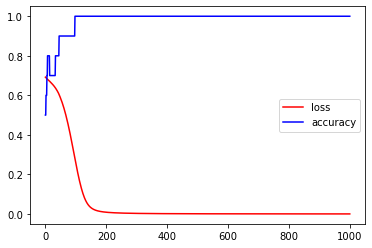

In [7]:
import matplotlib.pyplot as plt
y_loss = history.history['loss']
y_acc = history.history['accuracy']
plt.plot(np.arange(len(y_loss)), y_loss, c="red", label="loss")
plt.plot(np.arange(len(y_acc)), y_acc, c="blue", label="accuracy")
plt.legend(loc="best")
plt.show()

In [11]:
pred = model.predict(x_data)
print(pred)
print([ 1 if i >= 0.5 else 0 for i in pred])
print(list(y_data))

[[9.9984884e-01]
 [9.9947274e-01]
 [9.9991882e-01]
 [9.9991572e-01]
 [9.9988973e-01]
 [2.5057793e-04]
 [2.2098422e-04]
 [3.5592914e-04]
 [3.5086274e-04]
 [2.5305152e-04]]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
